First updated @ Nov 2, 2021

Last updated @ Nov 7, 2021

In [1]:
# install packages that I don't have
# %pip install plotnine
# %pip install imageio
# %pip install pandas-alive

## Import packages & data

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
from plotnine import *
from mizani.formatters import percent_format
# import os
# import imageio
# import pandas_alive

In [3]:
bechdel_df = pd.read_csv('./Data/Bechdel_detailed.csv')
bechdel_df.rename(columns={'rating': 'bt_score'}, inplace=True) # I find the name rating a little confusing
bechdel_df

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible
0,Passage de Venus,1874.0,0.0,0.0,3155794.0,9602.0,18880.0,2021-04-02 20:58:09,1.0
1,La Rosace Magique,1877.0,0.0,0.0,14495706.0,9804.0,19145.0,2021-05-11 00:11:22,1.0
2,Sallie Gardner at a Gallop,1878.0,0.0,0.0,2221420.0,9603.0,18882.0,2021-04-03 02:25:27,1.0
3,Le singe musicien,1878.0,0.0,0.0,12592084.0,9806.0,19151.0,2021-05-11 23:38:54,1.0
4,Athlete Swinging a Pick,1881.0,0.0,0.0,7816420.0,9816.0,19162.0,2021-05-13 01:32:14,1.0
...,...,...,...,...,...,...,...,...,...
9324,"Guilty, The",2021.0,1.0,0.0,9421570.0,10079.0,19599.0,2021-10-10 20:16:13,1.0
9325,Till Death,2021.0,0.0,0.0,11804152.0,10083.0,19613.0,2021-10-18 19:58:48,1.0
9326,"Last Duel, The",2021.0,3.0,1.0,4244994.0,10085.0,19619.0,2021-10-20 02:30:29,1.0
9327,Venom Let there be Carnage,2021.0,2.0,0.0,7097896.0,10092.0,19627.0,2021-10-21 10:11:03,1.0


In [4]:
bechdel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9329 entries, 0 to 9328
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9329 non-null   object 
 1   year         9329 non-null   float64
 2   bt_score     9329 non-null   float64
 3   dubious      9030 non-null   float64
 4   imdbid       9329 non-null   float64
 5   id           9329 non-null   float64
 6   submitterid  9329 non-null   float64
 7   date         9329 non-null   object 
 8   visible      9329 non-null   float64
dtypes: float64(7), object(2)
memory usage: 656.1+ KB


In [5]:
bechdel_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,9329.0,1.995885e+03,2.508474e+01,1874.0,1988.0,2005.0,2013.0,2021.0
bt_score,9329.0,2.121128e+00,1.106135e+00,0.0,1.0,3.0,3.0,3.0
dubious,9030.0,8.914729e-02,2.849720e-01,0.0,0.0,0.0,0.0,1.0
imdbid,9329.0,1.460786e+06,2.172080e+06,1.0,99422.0,420509.0,1856101.0,15324860.0
id,9329.0,4.963444e+03,2.894029e+03,1.0,2437.0,4958.0,7408.0,10107.0
submitterid,9329.0,9.149820e+03,6.086911e+03,1.0,3589.0,8987.0,14444.0,19655.0
visible,9329.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0


The bt_score is obviously negatively screwed, causing a ceiling effect. 

## Analysis & Visualization

Arguably, Python graphs are not the prettiest. So I am borrowing some R code to make certain graphs look prettier. Here, I will use a mixture of matplotlib and ggplot2, which is [PlotNine](https://towardsdatascience.com/how-to-use-ggplot2-in-python-74ab8adec129) in Python. 

### Distribution of all bt_score

We can see that over half of movies in this dataset pass the Bechdel Test, which is great!

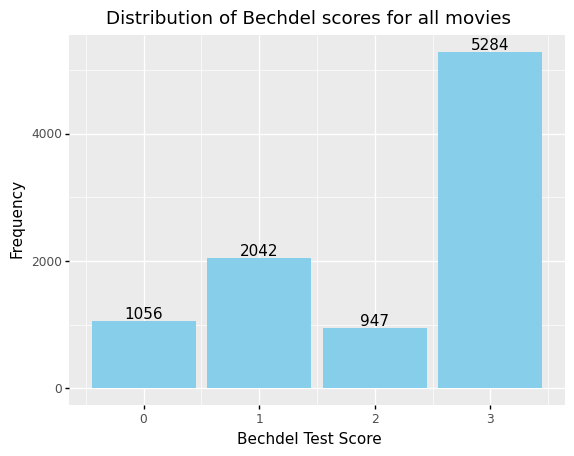

<ggplot: (8775703866877)>

In [6]:
(ggplot(bechdel_df, aes(x = 'bt_score')) + 
    geom_bar(fill='skyblue') + 
    geom_text(
        aes(label=after_stat('count')),
        stat='count',
        nudge_y=0.125,
        va='bottom'
    ) +
    labs(
        title = 'Distribution of Bechdel scores for all movies',
        x = 'Bechdel Test Score',
        y = 'Frequency'
    )
)

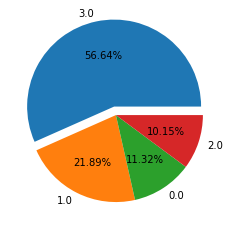

In [7]:
score_count_series = bechdel_df['bt_score'].value_counts()
gap = [0.1, 0, 0, 0]
plt.pie(np.array(score_count_series), labels = score_count_series.index, explode = gap, autopct='%.2f%%')
plt.show() 

### dubious proportion

About 9% of the scores are dubious, which is not too small of a proportion to overlook. 

In [8]:
dubious_count = bechdel_df['dubious'].value_counts()
print('Percentage of dubious movie scores:', str('{:.2f}'.format(dubious_count[1.0] / (dubious_count[1.0] + dubious_count[0.0]) * 100))+'%')

Percentage of dubious movie scores: 8.91%


Let's investigate this a little further and see what the dubious movies are really like.

In [9]:
dubious_movies = bechdel_df[bechdel_df['dubious'] == 1]
dubious_movies

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible
66,Akrobatisches Potpourri,1895.0,1.0,1.0,11.0,9679.0,18987.0,2021-04-24 19:08:28,1.0
69,Baby&#39;s Dinner,1895.0,1.0,1.0,29.0,9715.0,19029.0,2021-04-29 01:35:15,1.0
126,"Princess Nicotine; or, The Smoke Fairy",1909.0,2.0,1.0,1009.0,4409.0,7862.0,2013-07-28 12:00:46,1.0
137,A Florida Enchantment,1914.0,2.0,1.0,3973.0,4457.0,7991.0,2013-08-10 05:01:03,1.0
148,"Raffles, the Amateur Cracksman",1917.0,2.0,1.0,8489.0,2019.0,2700.0,2011-02-11 21:49:04,1.0
...,...,...,...,...,...,...,...,...,...
9287,America: The Motion Picture,2021.0,3.0,1.0,6733874.0,9924.0,19325.0,2021-07-02 21:22:53,1.0
9292,Luca,2021.0,1.0,1.0,12801262.0,9964.0,19374.0,2021-07-13 18:04:13,1.0
9300,Jungle Cruise,2021.0,3.0,1.0,870154.0,9996.0,19422.0,2021-08-04 08:47:20,1.0
9322,No Time To Die,2021.0,2.0,1.0,2382320.0,10075.0,19585.0,2021-10-04 08:29:46,1.0


In [10]:
print('Proportion of movies scored 0:', str('{:.2f}'.format(sum(dubious_movies['bt_score'] == 0.0) / len(dubious_movies) * 100))+'%')
print('Proportion of movies scored 1:', str('{:.2f}'.format(sum(dubious_movies['bt_score'] == 1.0) / len(dubious_movies) * 100))+'%')
print('Proportion of movies scored 2:', str('{:.2f}'.format(sum(dubious_movies['bt_score'] == 2.0) / len(dubious_movies) * 100))+'%')
print('Proportion of movies scored 3:', str('{:.2f}'.format(sum(dubious_movies['bt_score'] == 3.0) / len(dubious_movies) * 100))+'%')

Proportion of movies scored 0: 2.73%
Proportion of movies scored 1: 9.81%
Proportion of movies scored 2: 13.54%
Proportion of movies scored 3: 73.91%


This is tricky because nothing is certain... and humans hate uncertainty. But I do not really want to just discard this information. I think it is better to classify movies in to 3 categories: passing, failing the Bechdel test and dubious. 

In [11]:
for index, bt_score in bechdel_df['bt_score'].iteritems():
    if bt_score == 0:
        if bechdel_df.at[index, 'dubious'] == 1:
            bechdel_df.at[index, 'category'] = 'Dubious'
        else:
            bechdel_df.at[index, 'category'] = '0-Fewer than two female characters'
    elif bt_score == 1:
        if bechdel_df.at[index, 'dubious'] == 1:
            bechdel_df.at[index, 'category'] = 'Dubious'
        else:
            bechdel_df.at[index, 'category'] = '1-Female characters do not talk'
    elif bt_score == 2:
        if bechdel_df.at[index, 'dubious'] == 1:
            bechdel_df.at[index, 'category'] = 'Dubious'
        else:
            bechdel_df.at[index, 'category'] = '2-Female characters talk about men'
    else:
        if bechdel_df.at[index, 'dubious'] == 1:
            bechdel_df.at[index, 'category'] = 'Dubious'
        else:
            bechdel_df.at[index, 'category'] = '3-Passes Bechdel Test'

In [12]:
bechdel_df.tail(10)

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible,category
9319,Dune,2021.0,2.0,0.0,1160419.0,10052.0,19545.0,2021-09-16 08:04:46,1.0,2-Female characters talk about men
9320,#Nofilter,2021.0,0.0,0.0,14843560.0,10065.0,19562.0,2021-09-20 02:39:47,1.0,0-Fewer than two female characters
9321,CODA,2021.0,3.0,0.0,10366460.0,10076.0,19587.0,2021-10-04 21:49:55,1.0,3-Passes Bechdel Test
9322,No Time To Die,2021.0,2.0,1.0,2382320.0,10075.0,19585.0,2021-10-04 08:29:46,1.0,Dubious
9323,"Many Saints of Newark, The",2021.0,2.0,0.0,8110232.0,10074.0,19583.0,2021-10-03 22:25:04,1.0,2-Female characters talk about men
9324,"Guilty, The",2021.0,1.0,0.0,9421570.0,10079.0,19599.0,2021-10-10 20:16:13,1.0,1-Female characters do not talk
9325,Till Death,2021.0,0.0,0.0,11804152.0,10083.0,19613.0,2021-10-18 19:58:48,1.0,0-Fewer than two female characters
9326,"Last Duel, The",2021.0,3.0,1.0,4244994.0,10085.0,19619.0,2021-10-20 02:30:29,1.0,Dubious
9327,Venom Let there be Carnage,2021.0,2.0,0.0,7097896.0,10092.0,19627.0,2021-10-21 10:11:03,1.0,2-Female characters talk about men
9328,Respect,2021.0,3.0,0.0,2452150.0,10106.0,19654.0,2021-10-24 21:14:06,1.0,3-Passes Bechdel Test


### Changes over the years

- Is the average of Bechdel score rising?
- Is the proportion of movies passing the Bechdel test rising? 

**Important Note**: There is no point in checking the NUMBER of movie passing the Bechdel Test over the years because of population affect, aka size affect. A simple example is that we talk about death rate changes over time, not number of deaths of the world, because there is more people on this planet than 100 years ago. The NUMBER is inflated by the growing population, causing the population affect. By checking the ratio, or proportion, we mitigate the population affect.

Same logic here, if there are more movies being released this year than 10 years ago, there would be more movies passing the bechdel test even if the ratio of passing stays the same. There is no point in checking the NUMBER. 

In [13]:
bechdel_year_mean = bechdel_df.groupby(['year'])['bt_score'].mean().to_frame().reset_index()
bechdel_year_mean.rename(columns={'bt_score': 'mean_bt_score'}, inplace=True)
bechdel_year_mean

,year,mean_bt_score
0,1874.0,0.000000
1,1877.0,0.000000
2,1878.0,0.000000
3,1881.0,0.000000
4,1883.0,0.000000
...,...,...
135,2017.0,2.344322
136,2018.0,2.338776
137,2019.0,2.365145
138,2020.0,2.519380


/Users/zhuang/opt/anaconda3/envs/ds/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


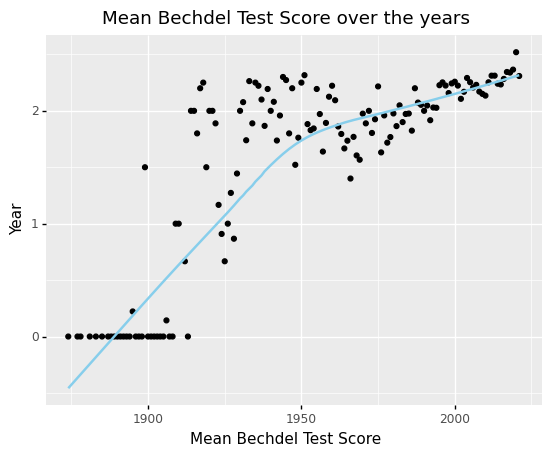

<ggplot: (8775710536182)>

In [14]:
# geom_smooth() is an estimate of the conditional mean function. 
# It draws a curve and gives you a general trend of the data
(ggplot(bechdel_year_mean, aes(x = 'year', y = 'mean_bt_score')) + 
    geom_point() + 
    geom_smooth(color='skyblue') + 
    labs(
        title = 'Mean Bechdel Test Score over the years',
        x = 'Mean Bechdel Test Score', 
        y = 'Year'
    )
)

Good news that the avegrage Bechdel score is increasing over the years! The smooth line helps us understand the general trend of the data, but I don't really like it going below 0 in the earlier years. But it has something to do with the mechanism of geom_smooth(), so I am going to let it slide. 

Is it because the proportion of movies passing the test is increasing? Let's find out.

In [15]:
# # first get total count of movies released in each year
# bechdel_year_proportion = bechdel_df.groupby(['year'])['bt_score'].count().to_frame().reset_index()
# bechdel_year_proportion.rename(columns={'bt_score': 'total_count'}, inplace=True)
# bechdel_year_proportion

In [16]:
bechdel_df_ordered = bechdel_df.copy()
bechdel_df_ordered['category'] = pd.Categorical(bechdel_df_ordered['category'], categories=[
    '0-Fewer than two female characters', 
    '1-Female characters do not talk',
    '2-Female characters talk about men', 
    'Dubious',
    '3-Passes Bechdel Test'
], ordered=True)

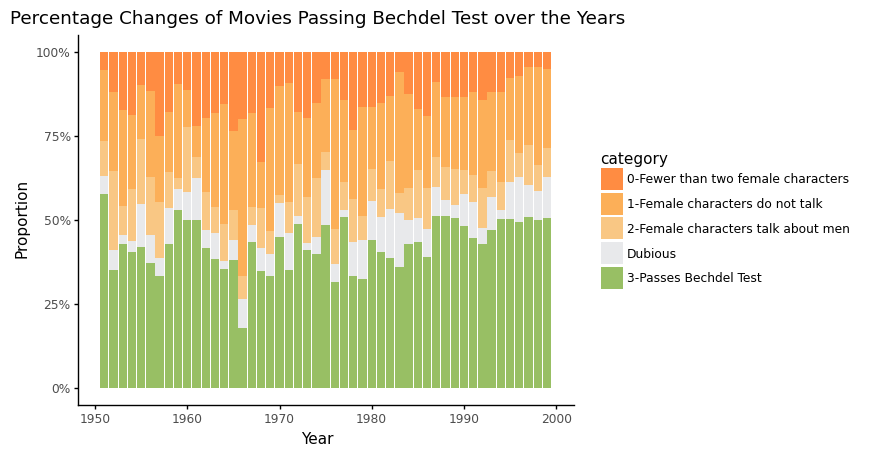

<ggplot: (8775710832511)>

In [17]:
# fitting all the years in the graph looks terrible
# Here I selected the data between 1950-2000 to make it a little better, but it is still not good
(ggplot(bechdel_df_ordered[(bechdel_df_ordered['year'] > 1950) & (bechdel_df_ordered['year'] < 2000)], 
        aes(fill = 'category', x = 'year')) + 
    geom_bar(position = "fill") + 
    scale_y_continuous(labels=percent_format()) +
    scale_fill_manual(values = ['#FF8C42', '#FCAF58', '#F9C784', '#E8E9EB', '#98BF64']) +
    labs(
        title = 'Percentage Changes of Movies Passing Bechdel Test over the Years', 
        subtitle = 'Stacked Percentage Bar Chart',
        x = 'Year', 
        y = 'Proportion'
    ) + 
    theme_classic()
)

Segmenting yearly seems a little difficult to read. I am going to try segmenting by 10 years.

In [18]:
# Adding a new column that segment the years in to 10-year intervals
for index, year in bechdel_df_ordered['year'].iteritems():
    interval_start = int(year - year % 10 + 1)
    interval_end = int(interval_start + 9)
    bechdel_df_ordered.at[index, 'year_interval'] = str(interval_start) + '-' + str(interval_end)
bechdel_df_ordered

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible,category,year_interval
0,Passage de Venus,1874.0,0.0,0.0,3155794.0,9602.0,18880.0,2021-04-02 20:58:09,1.0,0-Fewer than two female characters,1871-1880
1,La Rosace Magique,1877.0,0.0,0.0,14495706.0,9804.0,19145.0,2021-05-11 00:11:22,1.0,0-Fewer than two female characters,1871-1880
2,Sallie Gardner at a Gallop,1878.0,0.0,0.0,2221420.0,9603.0,18882.0,2021-04-03 02:25:27,1.0,0-Fewer than two female characters,1871-1880
3,Le singe musicien,1878.0,0.0,0.0,12592084.0,9806.0,19151.0,2021-05-11 23:38:54,1.0,0-Fewer than two female characters,1871-1880
4,Athlete Swinging a Pick,1881.0,0.0,0.0,7816420.0,9816.0,19162.0,2021-05-13 01:32:14,1.0,0-Fewer than two female characters,1881-1890
...,...,...,...,...,...,...,...,...,...,...,...
9324,"Guilty, The",2021.0,1.0,0.0,9421570.0,10079.0,19599.0,2021-10-10 20:16:13,1.0,1-Female characters do not talk,2021-2030
9325,Till Death,2021.0,0.0,0.0,11804152.0,10083.0,19613.0,2021-10-18 19:58:48,1.0,0-Fewer than two female characters,2021-2030
9326,"Last Duel, The",2021.0,3.0,1.0,4244994.0,10085.0,19619.0,2021-10-20 02:30:29,1.0,Dubious,2021-2030
9327,Venom Let there be Carnage,2021.0,2.0,0.0,7097896.0,10092.0,19627.0,2021-10-21 10:11:03,1.0,2-Female characters talk about men,2021-2030


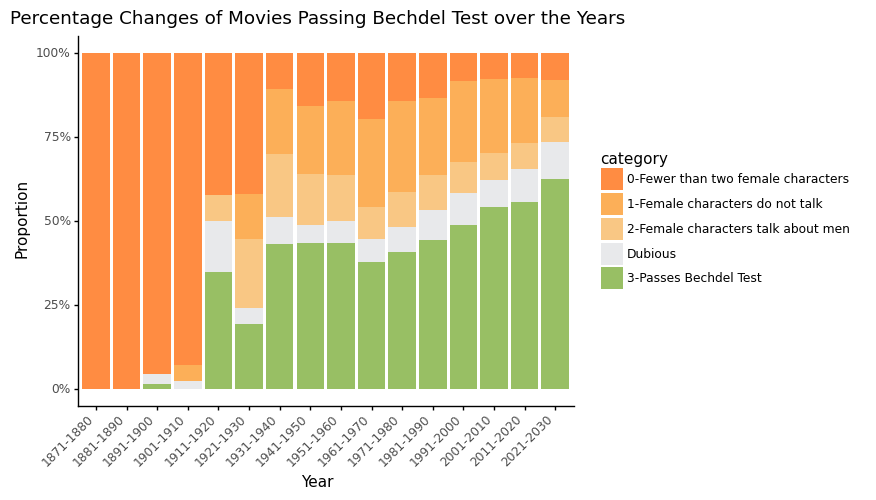

<ggplot: (-9223363261144243540)>

In [19]:
(ggplot(bechdel_df_ordered, 
        aes(fill = 'category', x = 'year_interval')) + 
    geom_bar(position = "fill") + 
    scale_y_continuous(labels=percent_format()) +
    scale_fill_manual(values = ['#FF8C42', '#FCAF58', '#F9C784', '#E8E9EB', '#98BF64']) +
    # geom_text(angle=45) + 
    labs(
        title = 'Percentage Changes of Movies Passing Bechdel Test over the Years', 
        subtitle = 'Stacked Percentage Bar Chart',
        x = 'Year', 
        y = 'Proportion'
    ) + 
    theme_classic() + 
    theme(axis_text_x  = element_text(angle = 45, hjust = 1))
)

I think this one is better. And the general trend is easier to see. 

## GIF Vis

I don't like the fact that I cannot visualize all years in the bar chart, so I am thinking about making an animated pie chart to better understand the changes over the years. So far, no luck.

https://stackoverflow.com/questions/64734034/animating-pie-chart-using-funcanimation-showing-last-frame-only

In [20]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [62]:
bechdel_pie = bechdel_df.groupby(['year'])['bt_score'].count().to_frame().reset_index()
bechdel_pie.rename(columns={'bt_score': 'total'}, inplace=True)
# add counts of 0's
bechdel_pie_0 = bechdel_df[bechdel_df['category'] == '0-Fewer than two female characters'].groupby('year')['bt_score'].count()
for index_year, value_count in bechdel_pie_0.items():
    bechdel_pie.loc[bechdel_pie['year'] == index_year, ['0']] = value_count
# add counts of 1's
bechdel_pie_1 = bechdel_df[bechdel_df['category'] == '1-Female characters do not talk'].groupby('year')['bt_score'].count()
for index_year, value_count in bechdel_pie_1.items():
    bechdel_pie.loc[bechdel_pie['year'] == index_year, ['1']] = value_count
# add counts of 2's
bechdel_pie_2 = bechdel_df[bechdel_df['category'] == '2-Female characters talk about men'].groupby('year')['bt_score'].count()
for index_year, value_count in bechdel_pie_2.items():
    bechdel_pie.loc[bechdel_pie['year'] == index_year, ['2']] = value_count
# add counts of Dubious's
bechdel_pie_d = bechdel_df[bechdel_df['category'] == 'Dubious'].groupby('year')['bt_score'].count()
for index_year, value_count in bechdel_pie_d.items():
    bechdel_pie.loc[bechdel_pie['year'] == index_year, ['Dubious']] = value_count
# add counts of 3's
bechdel_pie_3 = bechdel_df[bechdel_df['category'] == '3-Passes Bechdel Test'].groupby('year')['bt_score'].count()
for index_year, value_count in bechdel_pie_3.items():
    bechdel_pie.loc[bechdel_pie['year'] == index_year, ['3']] = value_count
# fill all the empty values with 0's
bechdel_pie = bechdel_pie.fillna(0)

# check if counts match up
for index, total in bechdel_pie['total'].iteritems():
    assert bechdel_pie.at[index, '0'] + bechdel_pie.at[index, '1'] + bechdel_pie.at[index, '2'] + bechdel_pie.at[index, 'Dubious'] + bechdel_pie.at[index, '3'] == bechdel_pie.at[index, 'total']
bechdel_pie

,year,total,0,1,2,Dubious,3
0,1874.0,1,1.0,0.0,0.0,0.0,0.0
1,1877.0,1,1.0,0.0,0.0,0.0,0.0
2,1878.0,2,2.0,0.0,0.0,0.0,0.0
3,1881.0,1,1.0,0.0,0.0,0.0,0.0
4,1883.0,1,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
135,2017.0,273,19.0,49.0,20.0,34.0,151.0
136,2018.0,245,18.0,41.0,20.0,23.0,143.0
137,2019.0,241,15.0,41.0,14.0,17.0,154.0
138,2020.0,129,8.0,15.0,7.0,13.0,86.0


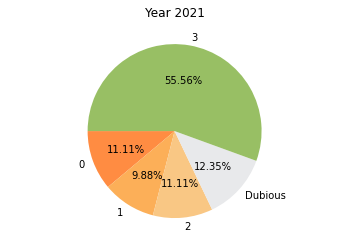

In [84]:
counts_title = np.array(bechdel_pie[['0', '1', '2', 'Dubious', '3', 'year']])

colors = ['#FF8C42', '#FCAF58', '#F9C784', '#E8E9EB', '#98BF64']
labels = ["0", "1", "2", "Dubious", "3"]
gap = [0, 0, 0, 0, 0]

fig, ax = plt.subplots()

def update(num):
    z = np.array(counts_title[num][:-1]).astype(float)
    ax.clear()
    ax.axis('equal')
    ax.pie(z, explode=gap, labels=labels, colors=colors, autopct='%1.2f%%', shadow=False, startangle=180)
    ax.set_title('Year ' + str(int(counts_title[num][-1])))

ani = animation.FuncAnimation(fig, update, frames=range(len(counts_title)), repeat=False)
ani.save('bechdel.gif', writer='pillow', fps=1)